<hr style="border-top: 5px solid black;">

<div class="alert alert-block alert-info" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Assessing the Assumptions for ANOVA.</font></h1></center>
    <ol>
        <li><a href="#objective1">Assumptions.</a></li><br>
        <li><a href="#objective2">Violations Assumptions.</a></li><br>
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Assumptions.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
        <li>The assumptions for the ANOVA include:
            <ul>
                <li>the k samples must be drawn randomly from k distict populations</li><br>
                <li>the k samples are selected independnetly of one another</li><br>
                <li>the response variable (dependent) has a normal distribution for each of the k populations</li><br>
                <li>The standard deviation for the dependent variable (response variable) has the same population standard deviation $\sigma$ among the k populations (homoscedasticity).</li><br>
            </ul>
        </li><br>
        <li>The residuals are the difference between the observed and predicted values of data.</li><br>      
        <li>Confirming these assumptions is essential before performing an ANOVA, and can be accomplished by performing a Shapiro-Wilk test for normality or visually using a residual plot or q-qplots.</li><br>
        <li>The following R code will demonstrate how to perform these procedures using data for the protein content in several types of grain.</li><br>     
    </ul>
</div>

## Assessing Normality with Residual Plots

In [1]:
grain.data <- read.csv('static/data/thiamin.csv')
attach(grain.data)
grain.aov <- aov(thiamin~grain)
grain.res <- residuals( grain.aov )
grain.res

1           2           3           4           5           6 
-0.51666667 -1.21666667  0.28333333  0.38333333  0.98333333  0.08333333 
          7           8           9          10          11          12 
-0.10000000  1.40000000 -0.50000000  0.90000000 -0.70000000 -1.00000000 
         13          14          15          16          17          18 
 0.30000000 -0.80000000  0.90000000 -0.60000000  0.50000000 -0.30000000 
         19          20          21          22          23          24 
 1.31666667 -0.88333333  0.81666667  0.01666667 -1.48333333  0.21666667

## Plot Normal Q-Q Plot

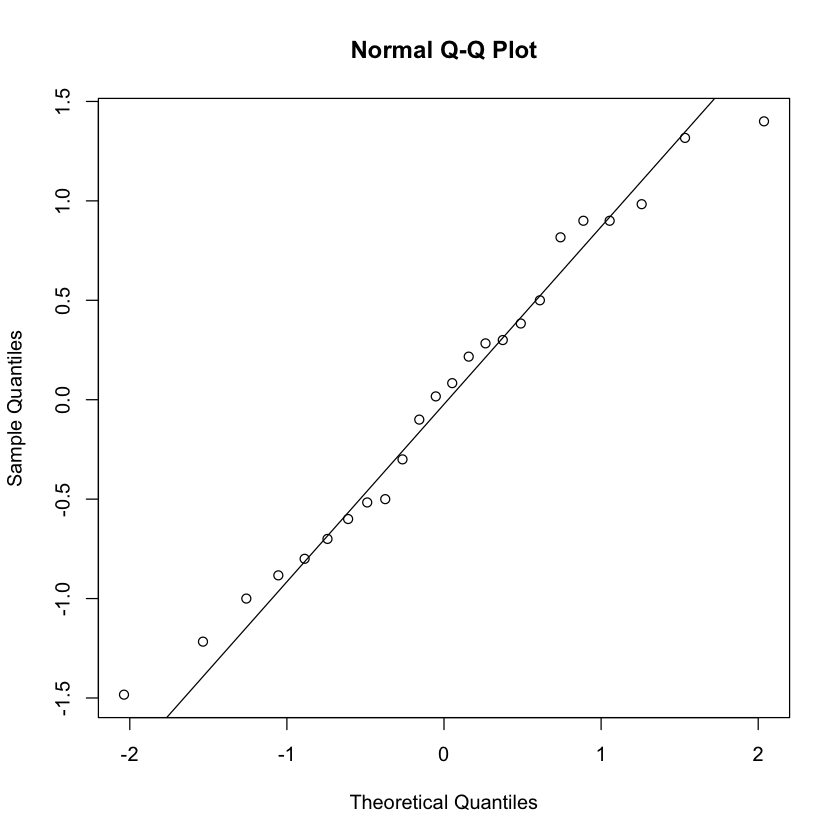

In [2]:
qqnorm(grain.res)
qqline(grain.res)

## Test for normality using a shapiro-wilk test in R

 - The code requires the residuals

In [3]:
 shapiro.test(grain.res)


	Shapiro-Wilk normality test

data:  grain.res
W = 0.97297, p-value = 0.7403


# Assessing Homoscedasticity

 - performing a homogeneity of variance hypothesis test
 - Using a graphica tool

## Tests for Homogeneity of Variance

 - Uses an F-test to determine if the two populations have the same variance
 - The hypothesis test is $$H_0\colon\sigma_1^2=\sigma_2^2=\dotsb=\sigma_k^2\quad\text{against}\quad H_a\colon\text{there exists some difference in the $\sigma_i^2$'s}$$
 - The Leven's test is a popular procedure
 - A One-Way ANOVA procedure on the squares of residual is another method, as illustrated below using the <code>anova(aov(response_variable.residual^2~independent_variable))</code>
 - In the example below, the p-value is over 0.05, which means that we retain the $H_0$, and the groups have equal variance (homoscedasticity)

In [4]:
anova( aov( grain.res^2~grain ) )

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
grain,3,1.054634,0.3515446,0.8174329,0.4993725
Residuals,20,8.601185,0.4300593,NA,NA


## Plots to visualize residuals against fitted values

 - This method places the One-Way ANOVA in the context of the general linear model
 - The method evaluates the residuals (the observed error terms) from the model
 - The normal q-q plot on the set of residuals asses the assumption that the error term is normally distributed
 - To assess homoscedasticity, we then look at the scatter of residuals against the fitted values from the model
 - In a one-way ANOVA the k fitted values $\hat{\mu_{i}} = \bar{y_{i}}$, for each of the k group means.
 - we can apply this method in R as follows
 - You want to see roughly equal ranges for each x-value.

In [5]:
grain.fit <- fitted.values( grain.aov )
grain.fit

1        2        3        4        5        6        7        8 
5.716667 5.716667 5.716667 5.716667 5.716667 5.716667 6.600000 6.600000 
       9       10       11       12       13       14       15       16 
6.600000 6.600000 6.600000 6.600000 5.500000 5.500000 5.500000 5.500000 
      17       18       19       20       21       22       23       24 
5.500000 5.500000 6.983333 6.983333 6.983333 6.983333 6.983333 6.983333

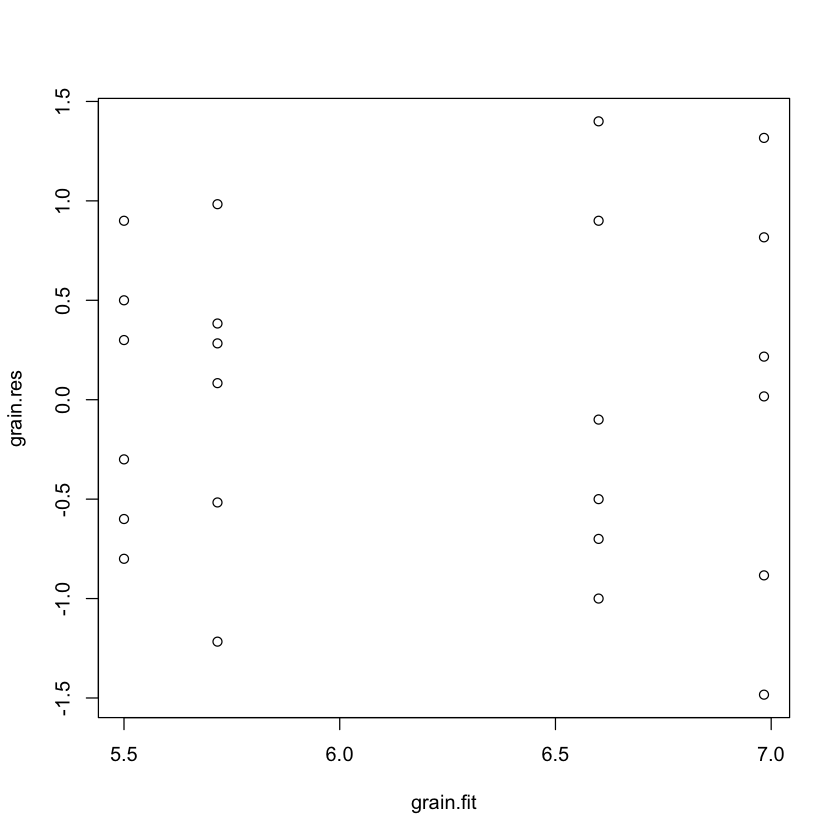

In [6]:
plot(x=grain.fit, y=grain.res)

## Plot student residuals against the fitted data

 - The studentized residuals is just the residuals divided by the root mean square
 - The root mean square is the the standard deviation of the sample residual
 - We create this plot by calculating the root.MSE and dividing the residuals by this value
 - We then plot the fitted values by this series
 - We want to see that the residuals have roughtly the same range for each x value.

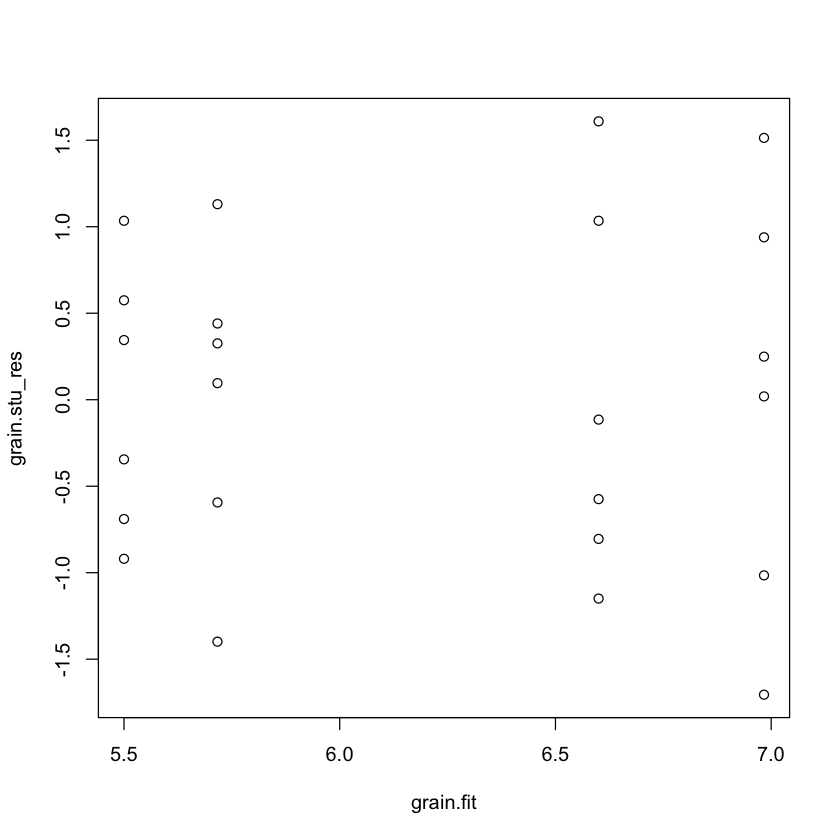

In [7]:
root.MSE <- 0.869962
grain.stu_res <- grain.res/root.MSE # create studentized residuals by dividing by root.MSE
plot(x=grain.fit, y=grain.stu_res)

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Violations Assumptions..</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
       <li>If after performing this procedures there and the assumptions of normality and homoscedasticity are violated, then you will need to consider alternative approaches.</li><br>
       <li>Wilcoxon signed rank test: use this as a non parametric alternative to the paired t-test</li><br>
       <li>Wilcoxon-Mann-Whitney rank sum test: use this as a nonparameric alternative to the two-independent-samples t-test</li><br>
       <li>Kruskal-Wallis test: use this as an alternative to the ANOVA but it has the following assumptions:
        <ul>
           <li>k random samples of response variables that are either numeric or ordinal</li><br>
           <li>k samples are independent of one another</li><br>
           <li>the distribution of the responses in each population have the similar shapes when plotted.</li><br>
           <li></li><br>
       </ul>
        </li><br>
       <li>The hypothesis test for the Kruskal-Wallis test is:
        $$\begin{aligned} &H_0\colon\text{The $k$ populations have the same distribution}\\ \text{against }&H_a\colon\text{At least one of the $k$ populations are "shifted" from the others}\end{aligned}$$
        </li><br>
       <li>The example below will illustrate how to perform this in R using a sample dataset of oil spills.</li><br>        
    </ul>
</div>

## Load Data

In [8]:
spill.data <- read.csv('static/data/oilspills.csv')
attach(spill.data)
str(spill.data)

'data.frame':	51 obs. of  2 variables:
 $ accident: chr  "collision" "collision" "collision" "collision" ...
 $ spillage: num  189.3 43.2 181.7 70.1 50.5 ...


## Visualize data distribution

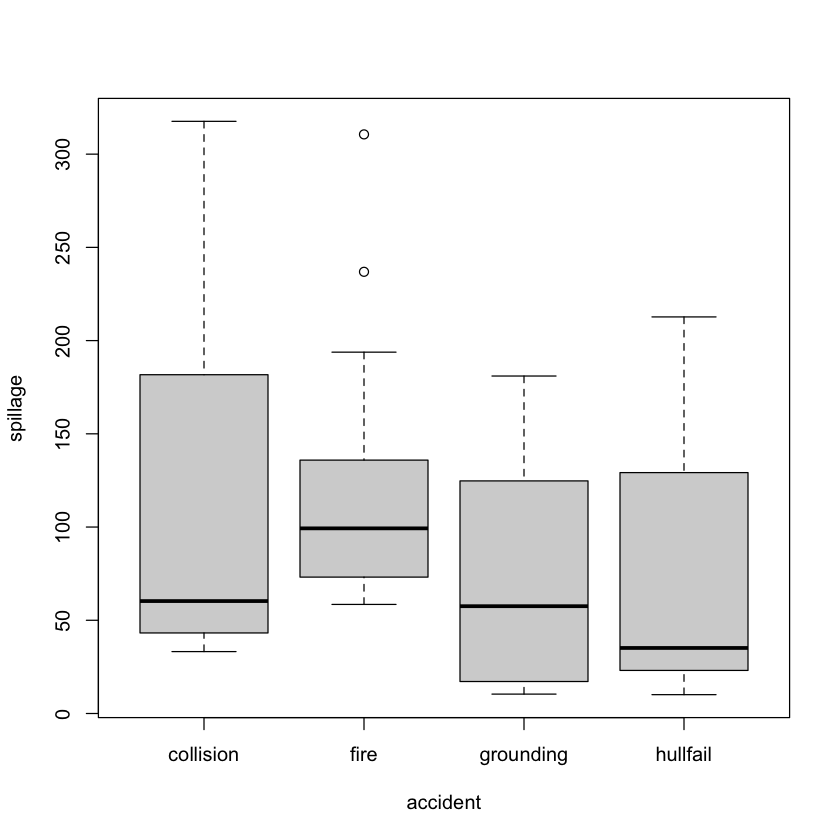

In [9]:
boxplot(spillage~accident)

# Perform One-Way ANOVA and evaluate the normal q-q plot and residual plots

 - Notice that the normal q-q plot has violation of normality and the residual plot also suggest the range for each value of x is not roughly equal, therefore use the Kruskal-Wallist test

In [10]:
spill.aov <- aov(spillage~accident)
anova(spill.aov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
accident,3,31422.51,10474.170,1.983333,0.1293252
Residuals,47,248211.45,5281.095,NA,NA


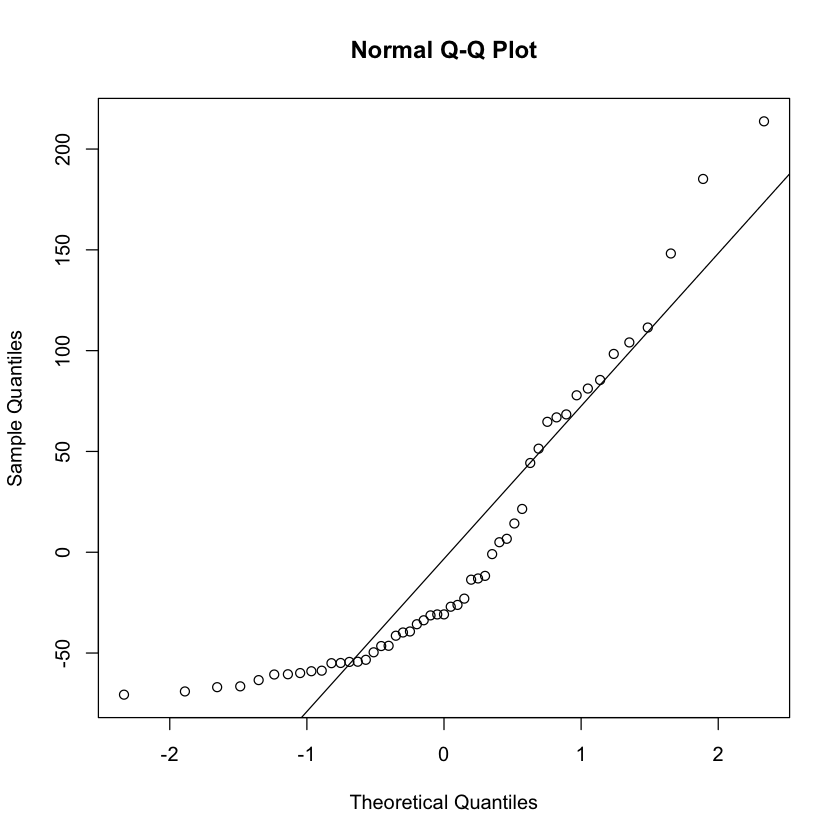

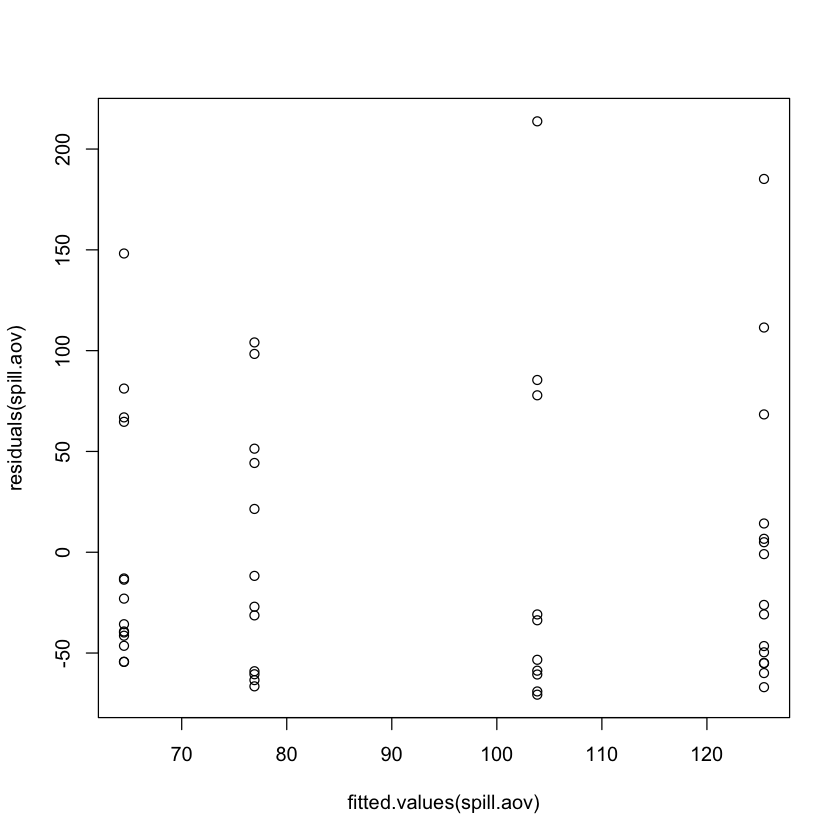

In [11]:
qqnorm(residuals(spill.aov))
qqline(residuals(spill.aov))
plot(x=fitted.values(spill.aov), y=residuals(spill.aov))

## Perform Kruskal-Wallist Test

 - Test produces a pvalue below 0.05, and suggest we should reject the $H_0$ hypothesis, and one group may be different

In [12]:
kruskal.test(spillage~accident)


	Kruskal-Wallis rank sum test

data:  spillage by accident
Kruskal-Wallis chi-squared = 9.0512, df = 3, p-value = 0.02862


## Perform follow up post hoc test using pairwise.wilcox.test

 - We see that the fire and hullfail have p-value below level of significance and this two groups must be different

In [13]:
pairwise.wilcox.test(spillage, accident)


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  spillage and accident 

          collision fire  grounding
fire      0.410     -     -        
grounding 0.912     0.234 -        
hullfail  0.410     0.041 0.912    

P value adjustment method: holm 

<hr style="border-top: 5px solid black;">